<a href="https://colab.research.google.com/github/Gauranga2022/Multimodal-Single-Cell-Integration/blob/main/Cell_Prediction_tSNE_3_Cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
from sklearn.manifold import TSNE
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

## Import Data

#### Train Data

In [3]:
start_time = time.time()
meta_data = pd.read_csv('/content/drive/MyDrive/Multimodal_Single_Cell analysis/metadata.csv')
end_time = time.time()
print(end_time - start_time)
meta_data.head()

1.3195691108703613


,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq


In [4]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281528 entries, 0 to 281527
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   cell_id     281528 non-null  object
 1   day         281528 non-null  int64 
 2   donor       281528 non-null  int64 
 3   cell_type   281528 non-null  object
 4   technology  281528 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.7+ MB


In [5]:
meta_data["cell_type"].value_counts()

HSC       77535
hidden    55935
NeuP      42979
EryP      41479
MasP      34827
MkP       24021
MoP        3883
BP          869
Name: cell_type, dtype: int64

In [6]:
start_time = time.time()
train = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/train_cite_inputs.h5')
display(train)
end_time = time.time()
print(end_time - start_time)

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.090185,0.000000
d02759a80ba2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.000000,0.000000,0.000000,0.000000
c016c6b0efa5,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.000000,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.000000,3.847321,3.847321,0.000000
ba7f733a4f75,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.000000,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.000000,3.436846,4.113780,0.000000
fbcf2443ffb2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.000000,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.518610,4.196826,3.518610,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650ee456f0f3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.397535,4.397535,5.084510,0.0,0.0,0.000000,0.000000,4.397535,4.397535
cc506e7707f5,0.0,0.0,0.0,0.0,0.0,0.000000,3.981467,4.665241,0.000000,0.000000,...,3.981467,0.000000,4.665241,3.981467,0.0,0.0,0.000000,0.000000,3.981467,0.000000
a91f1b55a520,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.497696,0.000000,4.497696,...,0.000000,0.000000,0.000000,4.497696,0.0,0.0,3.815622,4.497696,0.000000,0.000000


41.14074730873108


In [7]:
train = pd.merge(meta_data, train, how='inner', on=['cell_id'])
train.head()

,cell_id,day,donor,cell_type,technology,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,45006fe3e4c8,2,32606,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
1,d02759a80ba2,2,32606,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
2,c016c6b0efa5,2,32606,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
3,ba7f733a4f75,2,32606,NeuP,citeseq,0.0,0.0,0.0,0.0,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
4,fbcf2443ffb2,2,32606,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70988 entries, 0 to 70987
Columns: 22055 entries, cell_id to ENSG00000074755_ZZEF1
dtypes: float32(22050), int64(2), object(3)
memory usage: 5.8+ GB


In [9]:
values_to_remove = ['HSC', 'hidden', 'MkP', 'MoP', 'BP']
train = train[~train['cell_type'].isin(values_to_remove)]
train.head()

,cell_id,day,donor,cell_type,technology,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
2,c016c6b0efa5,2,32606,EryP,citeseq,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.000000,3.847321,3.847321,0.000000
3,ba7f733a4f75,2,32606,NeuP,citeseq,0.0,0.000000,0.0,0.0,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.000000,3.436846,4.113780,0.000000
4,fbcf2443ffb2,2,32606,EryP,citeseq,0.0,0.000000,0.0,0.0,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.518610,4.196826,3.518610,0.000000
5,d80d84ca8e89,2,32606,EryP,citeseq,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,3.651999,4.332091,0.0,0.0,3.651999,0.000000,4.733167,0.000000
8,b329261bd0ee,2,32606,MasP,citeseq,0.0,3.775647,0.0,0.0,0.0,...,0.000000,3.775647,0.000000,4.457267,0.0,0.0,0.000000,0.000000,4.457267,3.775647


In [10]:
columns_to_drop = ['cell_id', 'day', 'donor', 'technology', 'cell_type']
X = train.drop(columns=columns_to_drop, axis=1)

In [11]:
X.head()

,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
2,0.0,0.000000,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.000000,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.000000,3.847321,3.847321,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.000000,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.000000,3.436846,4.113780,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.000000,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.518610,4.196826,3.518610,0.000000
5,0.0,0.000000,0.0,0.0,0.0,0.000000,3.651999,0.000000,0.000000,3.651999,...,0.000000,0.000000,3.651999,4.332091,0.0,0.0,3.651999,0.000000,4.733167,0.000000
8,0.0,3.775647,0.0,0.0,0.0,0.000000,3.775647,0.000000,0.000000,4.457267,...,0.000000,3.775647,0.000000,4.457267,0.0,0.0,0.000000,0.000000,4.457267,3.775647


In [12]:
X1 = X.copy()

In [13]:
# X = X.iloc[:1000, :]

In [14]:
y = pd.DataFrame()

In [15]:
y["cell_type"] = train["cell_type"]
y.head()

,cell_type
2,EryP
3,NeuP
4,EryP
5,EryP
8,MasP


In [16]:
y1 = y.copy()

In [17]:
# y = y.iloc[:1000]

In [18]:
y.head()

,cell_type
2,EryP
3,NeuP
4,EryP
5,EryP
8,MasP


#### Test Data

In [19]:
start_time = time.time()
test = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/test_cite_inputs.h5')
display(test)
end_time = time.time()
print(end_time - start_time)

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
c2150f55becb,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,4.090185,0.000000
65b7edf8a4da,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.039545,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
c1b26cb1057b,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.000000,...,0.000000,0.000000,3.847321,4.529743,0.000000,0.0,0.00000,3.847321,3.847321,0.000000
917168fa6f83,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.000000,...,3.436846,0.000000,4.113780,5.020215,0.000000,0.0,0.00000,3.436846,4.113780,0.000000
2b29feeca86d,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.000000,...,0.000000,4.196826,4.196826,4.196826,0.000000,0.0,3.51861,4.196826,3.518610,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a9b4d99f1f50,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.719836,...,0.000000,0.000000,0.000000,3.719836,0.000000,0.0,0.00000,0.000000,3.719836,0.000000
0e2c1d0782af,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,4.026206,0.000000,...,4.026206,0.000000,0.000000,4.026206,0.000000,0.0,0.00000,0.000000,4.710393,0.000000
a3cbc5aa0ec3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,4.306634,0.000000,0.000000,0.0,0.00000,4.306634,6.933096,4.993019


31.7688729763031


In [20]:
test = pd.merge(meta_data, test, how='inner', on=['cell_id'])
test.head()

,cell_id,day,donor,cell_type,technology,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,c2150f55becb,2,27678,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
1,65b7edf8a4da,2,27678,HSC,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
2,c1b26cb1057b,2,27678,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
3,917168fa6f83,2,27678,NeuP,citeseq,0.0,0.0,0.0,0.0,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
4,2b29feeca86d,2,27678,EryP,citeseq,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [21]:
test["cell_type"].value_counts()

HSC     12995
EryP    10103
MasP     9848
NeuP     8925
MkP      5418
MoP      1231
BP        143
Name: cell_type, dtype: int64

In [22]:
columns_to_drop = ['cell_id', 'day', 'donor', 'technology', 'cell_type']
test_X = test.drop(columns=columns_to_drop, axis=1)

In [23]:
test_X.head()

,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,4.090185,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,4.039545,0.0,0.0,0.00000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,3.847321,0.000000,3.847321,3.847321,0.0,...,0.000000,0.000000,3.847321,4.529743,0.0,0.0,0.00000,3.847321,3.847321,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,3.436846,3.436846,0.000000,0.0,...,3.436846,0.000000,4.113780,5.020215,0.0,0.0,0.00000,3.436846,4.113780,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.196826,0.000000,0.0,...,0.000000,4.196826,4.196826,4.196826,0.0,0.0,3.51861,4.196826,3.518610,0.0


In [24]:
test_y = pd.DataFrame()
test_y["cell_type"] = test["cell_type"]
test_y.head()

,cell_type
0,HSC
1,HSC
2,EryP
3,NeuP
4,EryP


## Explore Data

<Axes: >

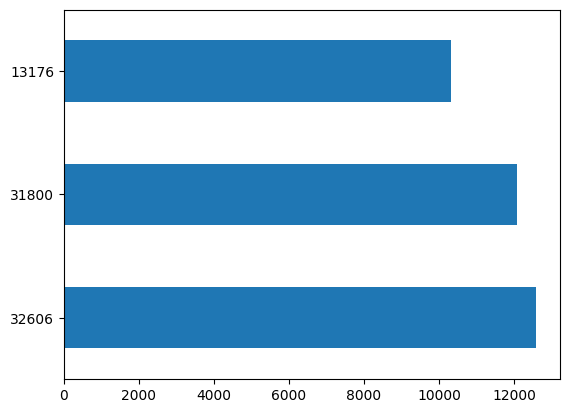

In [25]:
train["donor"].value_counts().plot(kind="barh")

<Axes: ylabel='cell_type'>

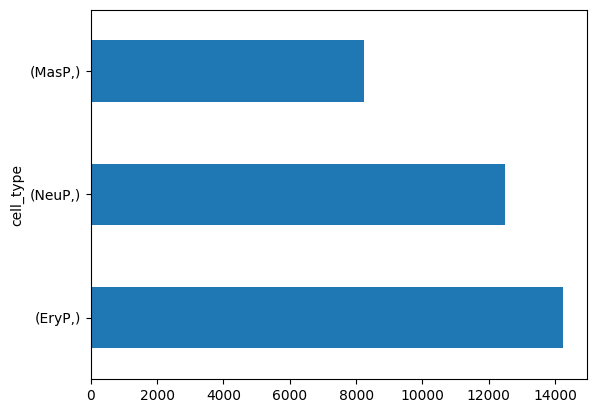

In [26]:
y.value_counts().plot(kind="barh")

In [27]:
min_zeros_columns = ['a', 'b']
min_zeros_counts = [float('inf'), float('inf')]

for column_name in X.columns:
    column = X[column_name]
    count = (column == 0.0).sum()

    if count < min_zeros_counts[0]:
        min_zeros_counts = [count, min_zeros_counts[0]]
        min_zeros_columns = [column_name, min_zeros_columns[0]]
    elif count < min_zeros_counts[1]:
        min_zeros_counts[1] = count
        min_zeros_columns[1] = column_name

print('Columns with the fewest number of zeros:', min_zeros_columns)
print('Number of zeros:', min_zeros_counts)

Columns with the fewest number of zeros: ['ENSG00000075624_ACTB', 'ENSG00000124172_ATP5F1E']
Number of zeros: [0, 0]


<Axes: xlabel='ENSG00000156508_EEF1A1', ylabel='ENSG00000087086_FTL'>

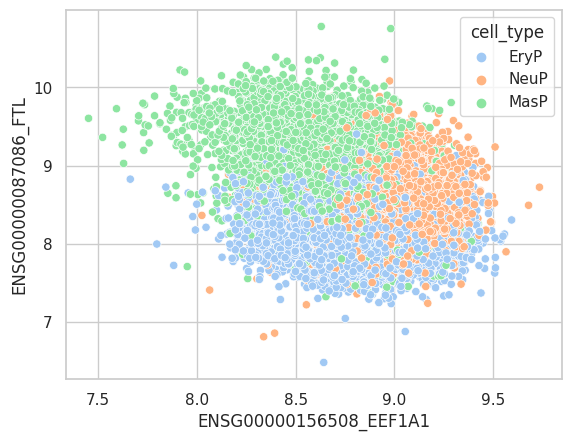

In [28]:
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X, x='ENSG00000156508_EEF1A1', y='ENSG00000087086_FTL', hue=y.iloc[:,0], palette="pastel")

In [29]:
# fig = px.scatter_3d(X_train, x="PC1", y="PC2", z="PC3", color=y_train, color_continuous_scale='GnBu')
# fig.show()

## Data Preprocessing

In [30]:
def label_processing(y):
  le = LabelEncoder()
  y = le.fit_transform(y.iloc[:,0])
  y = pd.DataFrame(y)
  return y.values.ravel()

In [31]:
y = label_processing(y)

In [32]:
y = pd.DataFrame(y)
y1 = y.values.flatten()

In [33]:
y

,0
0,0
1,2
2,0
3,0
4,1
...,...
34971,0
34972,0
34973,0
34974,1


## 2D t-SNE

### n_components=2, perplexity=1

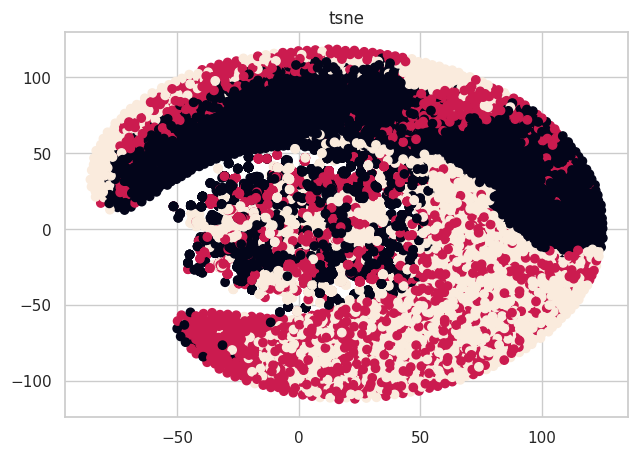

In [34]:
tsne = TSNE(n_components=2, perplexity=1, random_state=42)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(16,5))
ax1=plt.subplot(121)
plt.gca().set_title('tsne')
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=y, label=y1 )

### n_components=2, perplexity=5

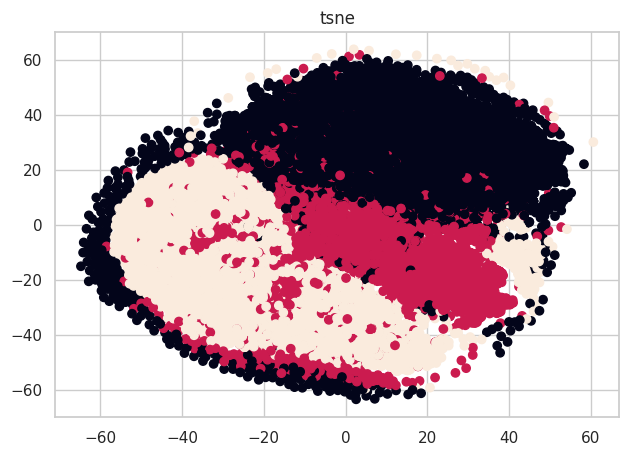

In [35]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(16,5))
ax1=plt.subplot(121)
plt.gca().set_title('tsne')
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=y, label=y1 )

In [36]:
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(tsne_data, y, test_size=0.4, random_state=42, shuffle=True)

### n_components=2, perplexity=20

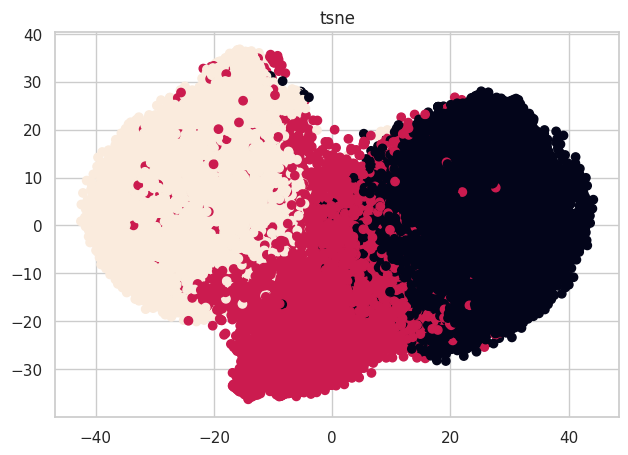

In [37]:
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(16,5))
ax1=plt.subplot(121)
plt.gca().set_title('tsne')
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=y, label=y1 )

### n_components=2, perplexity=50

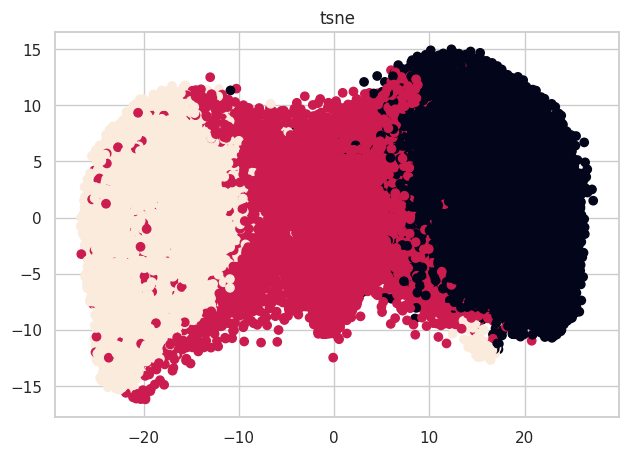

In [38]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(16,5))
ax1=plt.subplot(121)
plt.gca().set_title('tsne')
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=y, label=y1 )

### n_components=2, perplexity=70


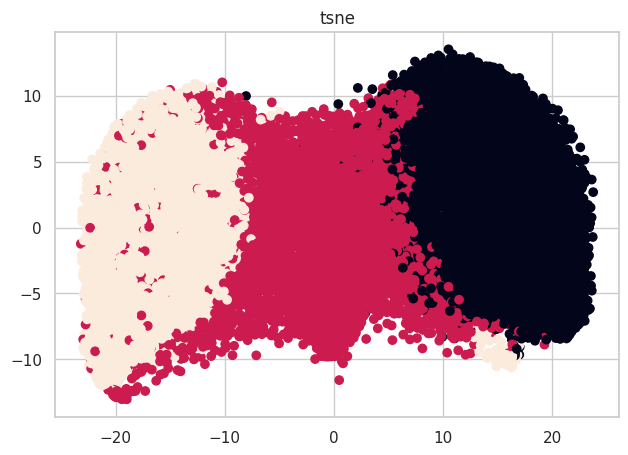

In [35]:
tsne = TSNE(n_components=2, perplexity=70, random_state=42)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(16,5))
ax1=plt.subplot(121)
plt.gca().set_title('tsne')
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=y, label=y1 )

### n_components=2, perplexity=100

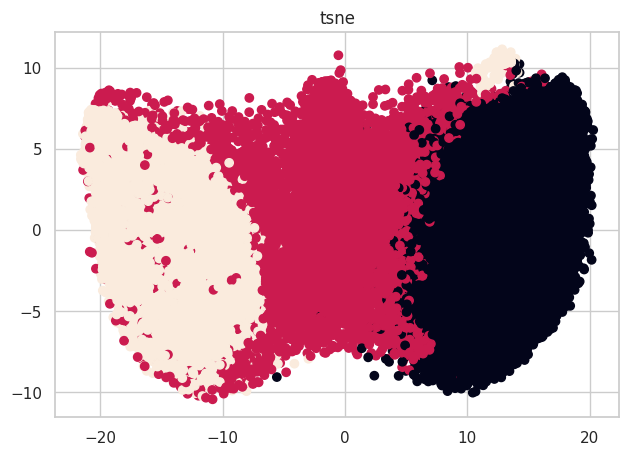

In [34]:
tsne = TSNE(n_components=2, perplexity=100, random_state=42)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(16,5))
ax1=plt.subplot(121)
plt.gca().set_title('tsne')
plt.scatter(tsne_data[:,0], tsne_data[:,1], c=y, label=y1 )

### Model - 2D t-SNE


In [ ]:
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(tsne_data, y, test_size=0.4, random_state=42, shuffle=True)

#### Random Forest

In [ ]:
start_time = time.time()
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000, oob_score=True)
rf.fit(X_train_2d, y_train_2d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = rf.predict(X_test_2d)
accuracy = accuracy_score(y_test_2d, y_pred)
print(f"Accuracy: {accuracy}")

#### KMeans

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_train_2d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = kmeans.predict(X_test_2d)
accuracy = accuracy_score(y_test_2d, y_pred)
print(f"Accuracy: {accuracy}")

#### Decision Tree

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train_2d, y_train_2d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = clf.predict(X_test_2d)
accuracy = accuracy_score(y_test_2d, y_pred)
print(f"Accuracy: {accuracy}")

#### XGBClassifier

In [ ]:
start_time = time.time()
xgb_model = XGBClassifier().fit(X_train_2d, y_train_2d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = xgb_model.predict(X_test_2d)
accuracy = accuracy_score(y_test_2d, y_pred)
print(f"Accuracy: {accuracy}")

## tSNE(n_components=3, perplexity=5)


In [ ]:
start_time = time.time()
tsne_3 = TSNE(n_components=3,perplexity=5, random_state=42)
tsne_data_3 = tsne_3.fit_transform(X)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(tsne_data_3, y, test_size=0.4, random_state=42, shuffle=True)

In [ ]:
tsne_data_3 = pd.DataFrame(tsne_data_3)
tsne_data_3.head()

In [ ]:
fig = px.scatter_3d(tsne_data_3, x=0, y=1, z=2, color=y1, color_continuous_scale='GnBu')
fig.show()

## tSNE(n_components=2, perplexity=20)


In [ ]:
X_train_2_20, X_test_2_20, y_train_3d, y_test_3d = train_test_split(tsne_data_3, y, test_size=0.4, random_state=42, shuffle=True)

In [ ]:
tsne_data_3 = pd.DataFrame(tsne_data_3)
tsne_data_3.head()

In [ ]:
fig = px.scatter_3d(tsne_data_3, x=0, y=1, z=2, color=y1, color_continuous_scale='GnBu')
fig.show()

## Model

#### Random Forest

In [ ]:
start_time = time.time()
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=1000, oob_score=True)
rf.fit(X_train_3d, y_train_3d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = rf.predict(X_test_3d)
accuracy = accuracy_score(y_test_3d, y_pred)
print(f"Accuracy: {accuracy}")

#### KMeans

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
kmeans.fit(X_train_3d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = kmeans.predict(X_test_3d)
accuracy = accuracy_score(y_test_3d, y_pred)
print(f"Accuracy: {accuracy}")

#### Decision Tree

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train_3d, y_train_3d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = clf.predict(X_test_3d)
accuracy = accuracy_score(y_test_3d, y_pred)
print(f"Accuracy: {accuracy}")

#### XGB Classifier

In [ ]:
start_time = time.time()
xgb_model = XGBClassifier().fit(X_train_3d, y_train_3d)
end_time = time.time()
print("Time Taken:", end_time - start_time)

In [ ]:
y_pred = xgb_model.predict(X_test_3d)
accuracy = accuracy_score(y_test_3d, y_pred)
print(f"Accuracy: {accuracy}")